['SpinalCord', 'Lung_R', 'Lung_L', 'Heart', 'Esophagus']


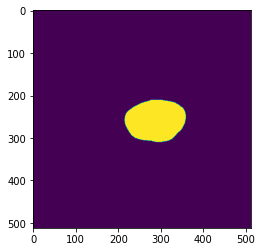

In [3]:
from rt_utils import RTStructBuilder
import matplotlib.pyplot as plt
import os
import pydicom
from os import walk
import numpy as np
import matplotlib.pyplot as plt
from rt_utils import RTStructBuilder



# Load existing RT Struct. Requires the series path and existing RT Struct path
rtstruct = RTStructBuilder.create_from(
  dicom_series_path="/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/manifest-1557326747206/LCTSC/LCTSC-Test-S1-101/79262", 
  rt_struct_path="/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/manifest-1557326747206/LCTSC/LCTSC-Test-S1-101/1-1.dcm"
)

# View all of the ROI names from within the image
print(rtstruct.get_roi_names())

# Loading the 3D Mask from within the RT Struct
mask_3d = rtstruct.get_roi_mask_by_name("Heart")

# Display one slice of the region
first_mask_slice = mask_3d[:, :, 50]
plt.imshow(first_mask_slice)
plt.show()


In [4]:
structs = rtstruct.get_roi_names()

['SpinalCord', 'Lung_R', 'Lung_L', 'Heart', 'Esophagus']

In [6]:
def count_no_slices(subdirs):
    N = 0
    for i in range(len(subdirs)):
        dicomdir = [os.path.join(subdirs[i], o) for o in os.listdir(subdirs[i]) 
                    if os.path.isdir(os.path.join(subdirs[i],o))][0]
        roifile = os.path.join(subdirs[i], "1-1.dcm")
        rtstruct = RTStructBuilder.create_from(
          dicom_series_path=dicomdir, 
          rt_struct_path=roifile
        )
        mask_3d = rtstruct.get_roi_mask_by_name(rtstruct.get_roi_names()[0])

        N = N + mask_3d.shape[2]
    return N

In [8]:
path = '/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES'


subdirs = [os.path.join(path, o) for o in os.listdir(path) 
                    if os.path.isdir(os.path.join(path,o))]
N = count_no_slices(subdirs)


START PROCESSING NEW PATIENT
/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/LCTSC-Test-S1-101/1-1.dcm
/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/LCTSC-Test-S1-101/79262
0
0
GETTING FILENAMES COMPLITED
file count: 130
skipped, no SliceLocation: 0
START PROCESSING NEW PATIENT
/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/LCTSC-Test-S1-102/1-1.dcm
/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/LCTSC-Test-S1-102/0.000000-CT114545RespCT  3.0  B30f  50 Ex-81163
130
130
GETTING FILENAMES COMPLITED
file count: 148
skipped, no SliceLocation: 0
START PROCESSING NEW PATIENT
/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/LCTSC-Test-S1-103/1-1.dcm
/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/LCTSC-Test-S1-103/0.000000-CT140006RespCT  3.0  B30f  50 Ex-17374
278
278
GETTING FILENAMES COMPLITED
file count: 152
skipped, no SliceLocation: 0
START PROCESSING NEW PATIENT
/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/LCTSC-Test-S1-104/1-1.dcm
/media/bot/DANE/MED_DATASETS/NARZ_ZAGRO2/FILES/LCTSC-Tes

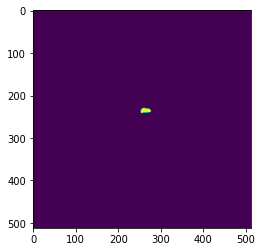

In [14]:
i = 0


# View all of the ROI names from within the image

# Loading the 3D Mask from within the RT Struct
H = 512
W = 512
R = 5
structures = ['SpinalCord', 'Lung_L', 'Lung_R', 'Heart', 'Esophagus']

masks = np.zeros((N, H, W, R), dtype = np.int16)
imgs = np. zeros((N, H, W, 1), dtype = np.int16)


index_in_big_array_mask = 0
index_in_big_array_img = 0

for i in range(len(subdirs)):
    dicomdir = [os.path.join(subdirs[i], o) for o in os.listdir(subdirs[i]) 
                    if os.path.isdir(os.path.join(subdirs[i],o))][0]
    roifile = os.path.join(subdirs[i], "1-1.dcm")
    print("START PROCESSING NEW PATIENT")
    print(roifile)
    print(dicomdir)
    print(index_in_big_array_mask)
    print(index_in_big_array_img)
    rtstruct = RTStructBuilder.create_from(
      dicom_series_path=dicomdir, 
      rt_struct_path=roifile
    )
    
    structure_index = 0
    for structure in structures:
        index = index_in_big_array_mask
        mask_3d = rtstruct.get_roi_mask_by_name(structure)
        for no_mask_slice in range(mask_3d.shape[2]):
            masks[index, :, :, structure_index] = mask_3d[:, :, no_mask_slice]
            index +=1 
        structure_index+=1
    index_in_big_array_mask = index
        
    #CREATING ARRAY OF IMAGES
    for (dirpath, dirnames, filenames) in walk(dicomdir):
        print("GETTING FILENAMES COMPLITED")

    files = []
    for fname in filenames:
        files.append(pydicom.dcmread(os.path.join(dicomdir, fname)))

    print("file count: {}".format(len(files)))

    # skip files with no SliceLocation (eg scout views)
    slices = []
    skipcount = 0
    for f in files:
        if hasattr(f, 'SliceLocation'):
            slices.append(f)
        else:
            skipcount = skipcount + 1

    print("skipped, no SliceLocation: {}".format(skipcount))

    slices = sorted(slices, key=lambda s: s.SliceLocation)
    
    for s in slices:
        imgs[index_in_big_array_img, :, :, 0] = s.pixel_array
        index_in_big_array_img +=1
    
    


# Display one slice of the region
first_mask_slice = mask_3d[:, :, 50]
plt.imshow(first_mask_slice)
plt.show()


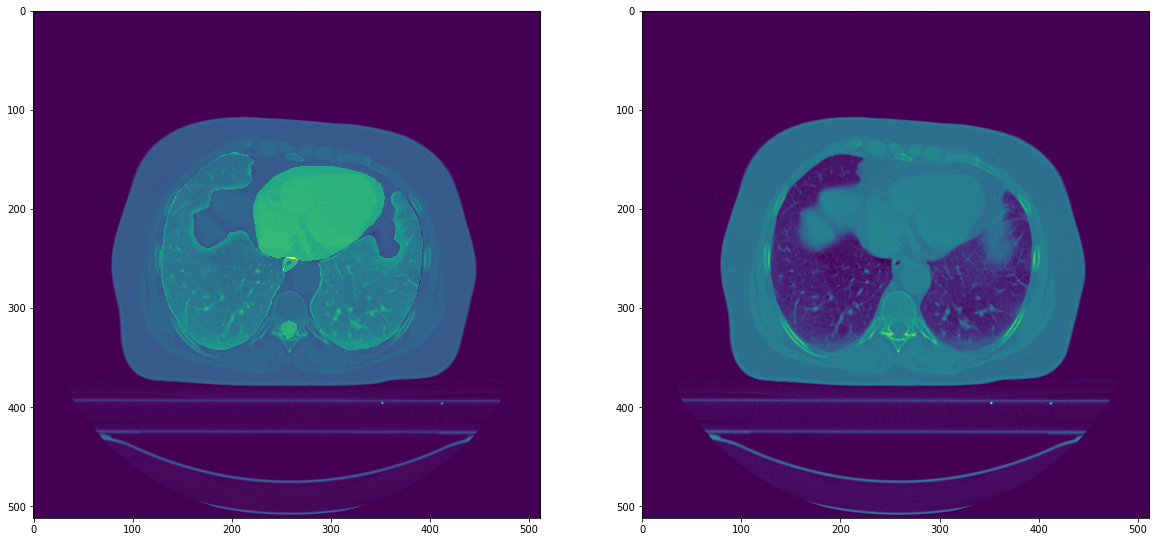

In [253]:
s = 175
maaas = masks[s, :, :, 0]+masks[s, :, :, 1]+masks[s, :, :, 2]+masks[s, :, :, 3]+masks[s, :, :, 4]

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(imgs[s, :, :,0]+1000*maaas)
plt.subplot(1,2,2)
plt.imshow(imgs[s, :, :,0])


In [18]:
np.save(os.path.join(path, 'imgs16'), imgs)
np.save(os.path.join(path, 'masks16'), masks)

In [256]:
masks.shape

(1700, 512, 512, 5)